# TEDx 

# importing libararies

In [210]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import matplotlib.pyplot as plt
sns.set_theme()

# DATA WRANGLING

In [3]:
df= pd.read_csv("data.csv")
df

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...
...,...,...,...,...,...,...
5435,The best stats you've ever seen,Hans Rosling,February 2006,15000000,458000,https://ted.com/talks/hans_rosling_the_best_st...
5436,Do schools kill creativity?,Sir Ken Robinson,February 2006,72000000,2100000,https://ted.com/talks/sir_ken_robinson_do_scho...
5437,Greening the ghetto,Majora Carter,February 2006,2900000,88000,https://ted.com/talks/majora_carter_greening_t...
5438,Simplicity sells,David Pogue,February 2006,2000000,60000,https://ted.com/talks/david_pogue_simplicity_s...


In [3]:
df.isnull().sum()

title     0
author    1
date      0
views     0
likes     0
link      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5440 non-null   object
 1   author  5439 non-null   object
 2   date    5440 non-null   object
 3   views   5440 non-null   int64 
 4   likes   5440 non-null   int64 
 5   link    5440 non-null   object
dtypes: int64(2), object(4)
memory usage: 255.1+ KB


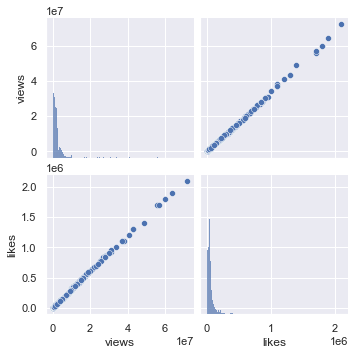

In [57]:
sns.pairplot(df);

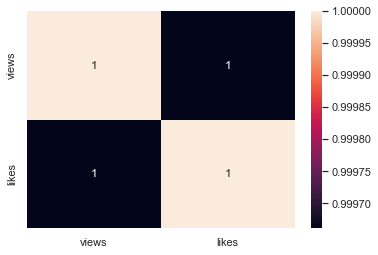

In [58]:
sns.heatmap(df.corr(),annot=True);

# EXPLORATIRY DATA ANALYS

# what are the top 10 views talks?

In [79]:
d=df.groupby(["title"])["views"].max().sort_values(ascending=False).head(10)
d

title
Do schools kill creativity?                                            72000000
Your body language may shape who you are                               64000000
Inside the mind of a master procrastinator                             60000000
How great leaders inspire action                                       57000000
The power of vulnerability                                             56000000
How to speak so that people want to listen                             49000000
The next outbreak? We're not ready                                     43000000
My philosophy for a happy life                                         43000000
What makes a good life? Lessons from the longest study on happiness    41000000
Looks aren't everything. Believe me, I'm a model.                      38000000
Name: views, dtype: int64

# what are the most  10 views by speaker ?

In [82]:
#df.groupby(["author"])["views"].max().sort_values().tail(5)
df.groupby(["author"])["views"].max().sort_values(ascending=False).head(10)

author
Sir Ken Robinson    72000000
Amy Cuddy           64000000
Tim Urban           60000000
Simon Sinek         57000000
Brené Brown         56000000
Julian Treasure     49000000
Bill Gates          43000000
Sam Berns           43000000
Robert Waldinger    41000000
Cameron Russell     38000000
Name: views, dtype: int64

# the fillter by title, author, yeartitle, author, year for the top 5:

In [59]:
df.groupby(["title","author","year"])["views"].max().sort_values(ascending=False).head()

title                                       author            year
Do schools kill creativity?                 Sir Ken Robinson  2006    72000000
Your body language may shape who you are    Amy Cuddy         2012    64000000
Inside the mind of a master procrastinator  Tim Urban         2016    60000000
How great leaders inspire action            Simon Sinek       2009    57000000
The power of vulnerability                  Brené Brown       2010    56000000
Name: views, dtype: int64

# data visualization

# This graph represents the highest  10 talks by views...

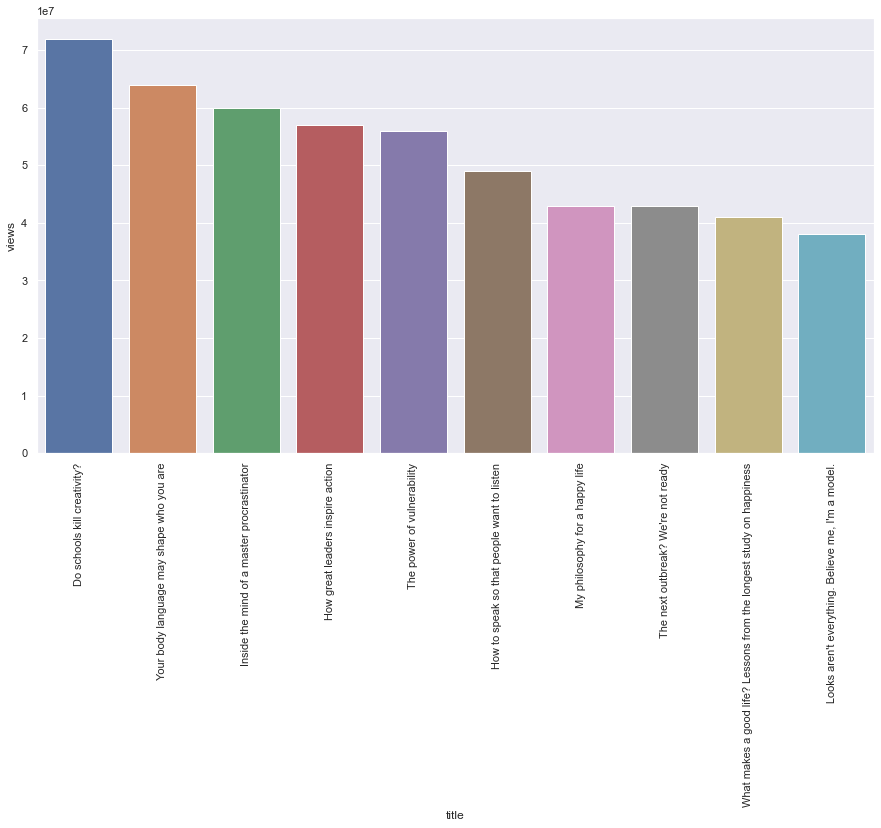

In [256]:
#df.groupby(["title"])["views"].max().sort_values().tail(10).plot(kind="bar");
dd=df.sort_values(by="views",ascending=False).head(10);
plt.figure(figsize=(15,8))
gra= sns.barplot(x="title", y="views", data=dd[['title','views']].head(10))
gra.tick_params(axis='x', rotation=90)

# what are the most  10 views by speaker talks?

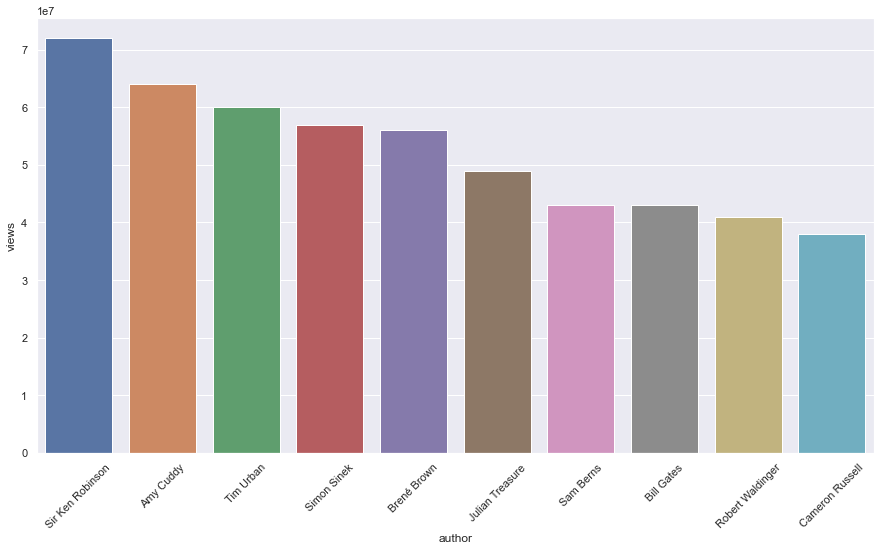

In [199]:
#df.groupby(["author"])["views"].max().sort_values().tail(5).plot(kind="bar");
dd=df.sort_values(by="views",ascending=False).head(10);
plt.figure(figsize=(15,8))
graf = sns.barplot(x="author", y="views", data=dd[['author','views']].head(10))
graf.tick_params(axis='x', rotation=45)

# This graph represents the highest  10 talks by views and speaker..

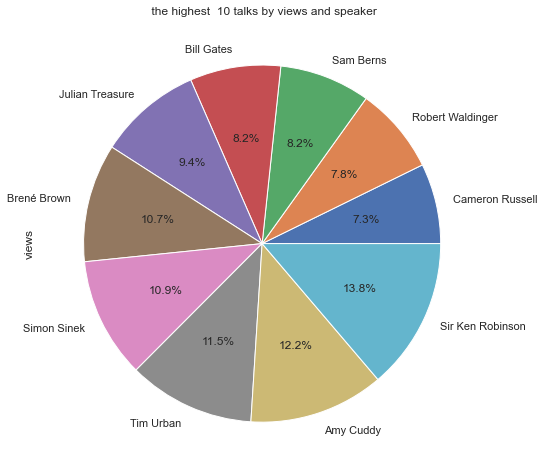

In [262]:
df.groupby(["author"])["views"].max().sort_values().tail(10).plot(kind="pie",figsize=(8,10),autopct='%1.1f%%',title=" the highest  10 talks by views and speaker");


# The time analysis

In [98]:
df['month'] = df['date'].apply(lambda x: x.split(' ')[0])
df['year'] =df['date'].apply(lambda x: x.split(' ')[1])

In [100]:
df.drop(["date"],axis=1,inplace=True)

# This graph represents the highest 5-year by views...

In [116]:
#df.sort_values(by="year",ascending=False)
df.groupby(["year"])["views"].sum().sort_values(ascending=False).head()

year
2015    1154740130
2013    1062537497
2017     998891600
2019     948119299
2016     928894896
Name: views, dtype: int64

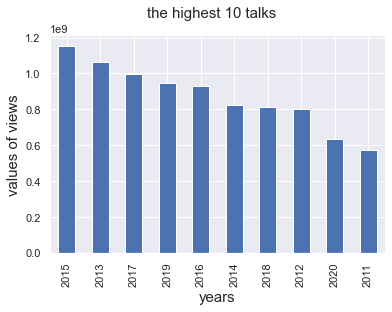

In [239]:
df.groupby(["year"])["views"].sum().sort_values(ascending=False).head(10).plot(kind="bar");
plt.suptitle("the highest 10 talks", fontsize=15);
plt.xlabel("years",fontsize=15);
plt.ylabel("values of views",fontsize=15);

# WHAT IS THE MOST MONTH WATCHED BY VIEW...

In [120]:
df.groupby(["month"])["views"].sum().sort_values(ascending=False).head()

month
February    1984575996
March       1375276896
April       1214604196
November    1180802199
June        1164034699
Name: views, dtype: int64

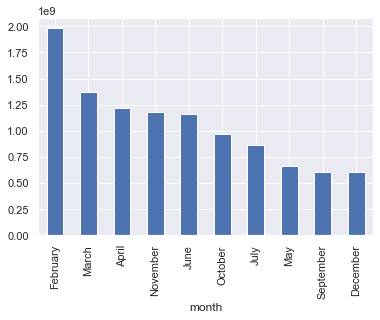

In [238]:
df.groupby(["month"])["views"].sum().sort_values(ascending=False).head(10).plot(kind="bar");


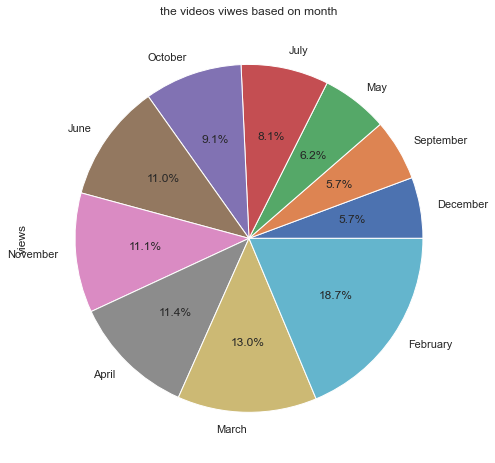

In [211]:
df.groupby(["month"])["views"].sum().sort_values().tail(10).plot(kind="pie",autopct='%1.1f%%',figsize=(10,8),title='the videos viwes based on month');




# This graph represents the Month-wise Analysis of TED talk frequency...


In [255]:
m=df.month.value_counts()
m

February     725
November     682
October      585
March        580
April        576
June         493
July         446
September    349
December     335
May          322
August       200
January      147
Name: month, dtype: int64

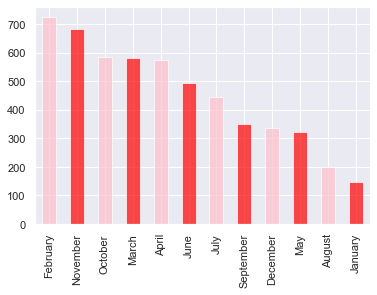

In [250]:
df.month.value_counts().plot(kind="bar",color=["pink","red"],alpha=0.7);

# analysis related with marketing department..

In [302]:
##the highest 50 videos titles views
df.groupby(["title","likes"])["views"].max().sort_values(ascending=False).head(50)#the num The next to the like is the number of views

title                                                                likes  
Do schools kill creativity?                                          2100000    72000000
Your body language may shape who you are                             1900000    64000000
Inside the mind of a master procrastinator                           1800000    60000000
How great leaders inspire action                                     1700000    57000000
The power of vulnerability                                           1700000    56000000
How to speak so that people want to listen                           1400000    49000000
The next outbreak? We're not ready                                   1300000    43000000
My philosophy for a happy life                                       1300000    43000000
What makes a good life? Lessons from the longest study on happiness  1200000    41000000
Looks aren't everything. Believe me, I'm a model.                    1100000    38000000
Why people believe they can't dra

In [303]:
##the lowest 10 videos titles views
df.groupby(["title","views"])["likes"].max().sort_values().head(50)

title                                                                                       views
Year In Ideas 2015                                                                          532       15
Post-Pandemic Paradise in Rapa Nui                                                          1200      37
Virtual Worlds                                                                              1300      39
"Jamie Raeburn" / "Baloo Baleerie" / "Twa recruitin Sergeants"                              1300      40
"Part II. The Journey Through Time" / "Ruslan and Lyudmila"                                 1300      40
The case for public media                                                                   1500      47
"Dive In"                                                                                   1600      49
A chef shares: Here's how we can feed the planet without hurting the climate                2100      65
Facing the future together                                    

#  What are the most frequent words?

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
comment_words = ''
for line in df.title:
    words = line.lower().split()
    comment_words += " ".join(words)+" "

In [ ]:
wordcloud = WordCloud(width = 1000, height = 800, background_color ='yellow', stopwords = stopwords, min_font_size = 10).generate(comment_words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()
#plt.savefig('wordcloud.png',trasparent = True)


![](Capture.PNG)

# Conclusion

1=We can see that Do schools kill creativity? by Sir Ken Robinson is one of the most popular Ted Talk till date.
2=taking the months into consideration February and November are the most popular months during which most of the Ted Talks take place. They make up almost 25.8% of the total distribution across all the months of the year.
3=if we look at the most common words on which the talks were conducted ,We can see words like Life,World,Future,Need,New,work,brain.
4=We can extract from the top 50 titles the elements that help the marketing team in creating our title


# THANK YOU



# Ahmed ElGazar